# Análise estatística dos dados do IBGE

No presente trabalho, faremos uma análise bem específica do Dataset do PNAD do IBGE 2010, buscando responder uma pergunta de negócio. Este trabalho foi proposto como desafio no primeiro módulo do curso de Data Science da Digital House e, abaixo, apresento a solução desenvolvida por mim.

## Objetivo &mdash; A pergunta de negócio:

A pergunta escolhida, a qual será respondida ao final da análise, foi:

**"As regiões do Brasil apresentam escolaridades médias (estatisticamente) diferentes?"**

In [97]:
# Importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

## EDA 

In [98]:
# Lendo e visualizando o dataset:

df = pd.read_csv(r'./data/demografia.csv')
display(df.head())
df.tail()

,seq,id,idade,sexo,anos_estudo,cor/raca,salario,estado_civil,regiao
0,0,1.100190e+10,53,homem,5.0,Parda,63600.000000,1.0,norte
1,1,1.100190e+10,49,mulher,8.0,Amarela,NaN,1.0,norte
2,2,1.100190e+10,22,mulher,11.0,Indigena,4352.400391,0.0,nordeste
3,3,1.100190e+10,55,homem,15.0,Amarela,96600.000000,1.0,norte
4,4,1.100190e+10,56,mulher,15.0,Amarela,157800.000000,1.0,norte


,seq,id,idade,sexo,anos_estudo,cor/raca,salario,estado_civil,regiao
66465,66465,5.311702e+10,34,mulher,5.0,Branca,NaN,1.0,centro-oeste
66466,66466,5.311702e+10,40,homem,5.0,Parda,2425.000000,1.0,centro-oeste
66467,66467,5.311702e+10,36,mulher,5.0,Parda,2425.000000,1.0,centro-oeste
66468,66468,5.311702e+10,27,mulher,5.0,Branca,5524.200195,1.0,centro-oeste
66469,66469,5.311702e+10,37,homem,5.0,Preta,460.350006,1.0,centro-oeste


In [102]:
# Como nosso objetivo é comparar apenas duas colunas do dataset, anos_estudo e regiao, vamos desconsiderar as demais:
df = df[['seq', 'anos_estudo', 'regiao']]
df.head()

,seq,anos_estudo,regiao
0,0,5.0,norte
1,1,8.0,norte
2,2,11.0,nordeste
3,3,15.0,norte
4,4,15.0,norte


In [100]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
seq,66470,NaN,NaN,NaN,33234.5,19188.4,0,16617.2,33234.5,49851.8,66469
anos_estudo,66036,NaN,NaN,NaN,8.68607,3.37452,5,5,8,11,15
regiao,66470,5,sudeste,25220,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Importante notar que ocorrem alguns valores nulos em anos_estudo, mas não em região. Vamos analisar cada variável individualmente.

### Explorando anos_estudo:

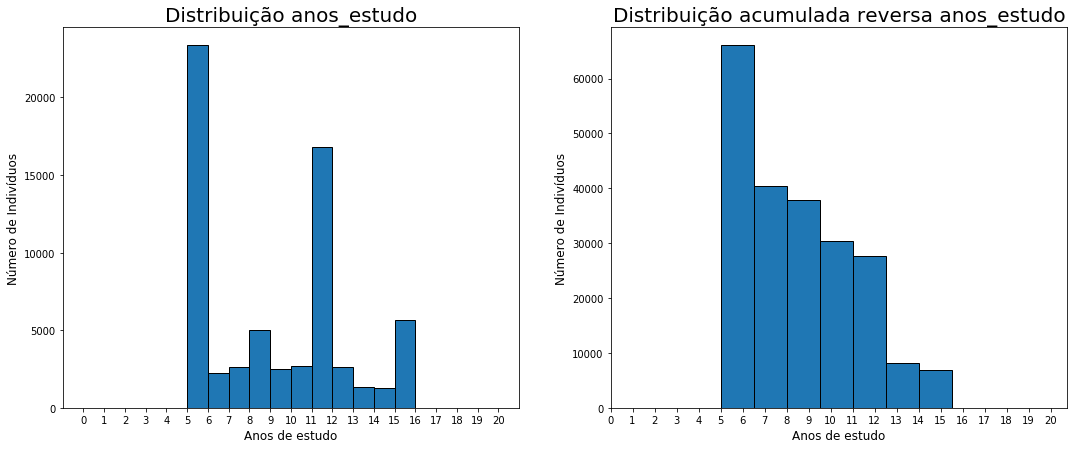

In [136]:
# Visualizando a distribuição:
fig, ax = plt.subplots(1,2, figsize=(18,7))

ax[0].hist(df.anos_estudo.dropna(), bins = 20, range= (0,20), ec='black')
ax[0].set_xticks(range(0,21))
ax[0].set_title('Distribuição anos_estudo', fontsize='20')
ax[0].set_xlabel('Anos de estudo', fontsize='12')
ax[0].set_ylabel('Número de Indivíduos', fontsize='12')

ax[1].hist(df.anos_estudo.dropna(), cumulative=-1, bins = 10, range = (5,20), ec='black')
ax[1].set_xticks(range(0,21))
ax[1].set_title('Distribuição acumulada reversa anos_estudo', fontsize='20')
ax[1].set_xlabel('Anos de estudo', fontsize='12')
ax[1].set_ylabel('Número de Indivíduos', fontsize='12')

plt.show()

&rarr; Aqui vale um comentário mais detalhado. Alguns pontos a serem observados:

1) A ocorrência dos picos no primeiro histograma deve-se aos ciclos de ensino no Brasil. 5 anos corresponde ao Ensino Fundamental I completo, 8 anos corresponde ao Ensino Fundamental II completo, 11 anos de estudo correspondem ao Ensino Médio completo e 14 e 15 anos de estudo correspondem ao Ensino Superior Completo

2) Em um país como o Brasil, em que 7% da população ainda é analfabeta (PNAD 2017), parece estranho que, em uma amostra com 66000 observações, nenhum indivíduo tenha menos do que 5 anos de estudo. Da mesma forma, parece estranho que nenhum indivíduo tenha mais do que 15 anos de estudo. Isso indica um viés em potencial na pesquisa.



In [103]:
# Nulos:
perc = df['anos_estudo'].isnull().sum()/df.shape[0] * 100
print('Os valores nulos correspondem a apenas {:.2f}% dos valores da coluna \'anos_estudo\'.'.format(perc))

Os valores nulos correspondem a apenas 0.65% dos valores da coluna 'anos_estudo'.


In [104]:
# Como os valores nulos correspondem a uma fração muito pequena do Dataset,
# vamos optar por desconsiderá-los uma vez que não é possível inferir a que se referem.
df.dropna(subset=['anos_estudo'], inplace=True)

### Explorando 'região'

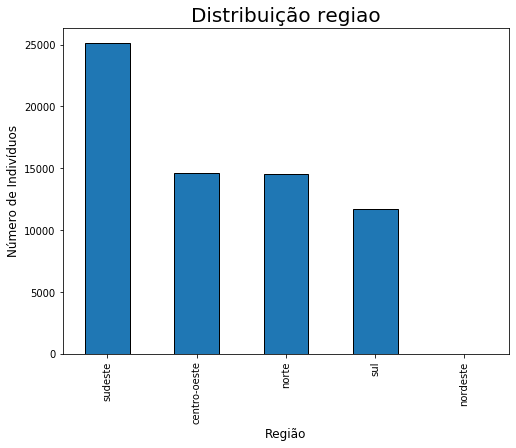

In [140]:
# Visualizando a distribuição de indivíduos nas regiões do Brasil na amostra:
fig, ax = plt.subplots(figsize=(8,6))
df.regiao.value_counts().plot(ax=ax, kind='bar', ec='black')
ax.set_title('Distribuição regiao', fontsize='20')
ax.set_xlabel('Região', fontsize='12')
ax.set_ylabel('Número de Indivíduos', fontsize='12')
plt.show()

&rarr; Aqui podemos perceber mais um problema da amostra. Pouquíssimos indivíduos da região nordeste. Mais uma prova de que essa amostra é enviesada e não é representativa da população brasileira.

In [141]:
df.regiao.value_counts()

sudeste         25111
centro-oeste    14652
norte           14555
sul             11713
nordeste            5
Name: regiao, dtype: int64

De fato, apenas 5 indivíduos da região Nordeste. Como essa quantidade de indivíduos não é nem um pouco representativa, vamos optar por excluir a região das análises. Assim:

In [143]:
# Removendo a região nordeste:
df = df.loc[df['regiao']!='nordeste']

### Explorando anos_estudo vs região:

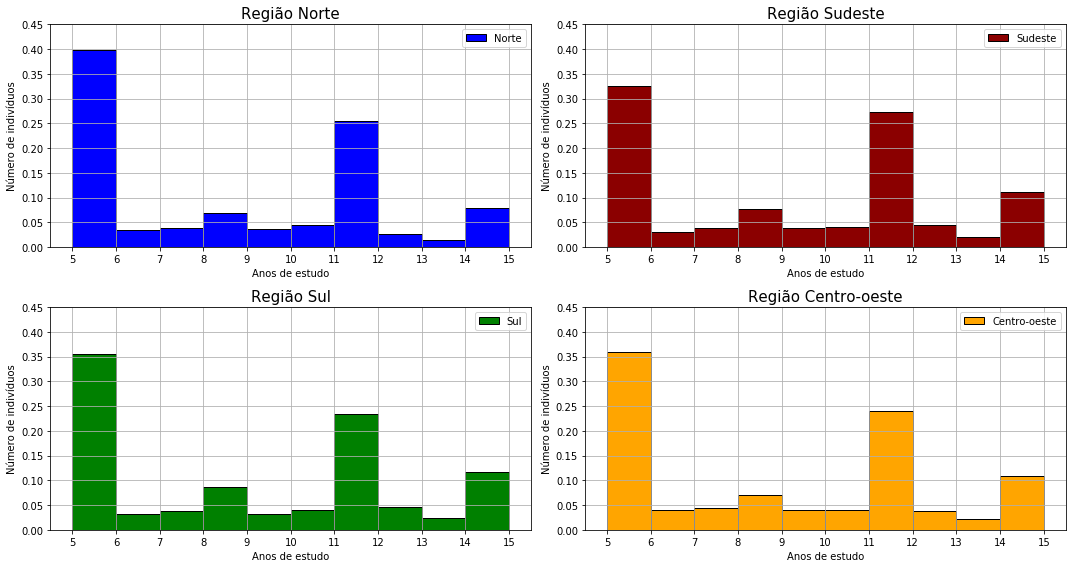

In [248]:
regioes = iter(df.regiao.unique())
colors = iter(['blue', 'darkred', 'green', 'orange'])
fig, axs = plt.subplots(2,2, figsize=(15,8))

for ax in axs.flat:
    regiao = next(regioes)
    color_ = next(colors)
    ax.hist(df.loc[df['regiao']==regiao, 'anos_estudo'], bins = 10, ec='black', density=True, color=color_)
    ax.grid()
    ax.set_xticks(range(5,16))
    ax.set_ylim(0,0.45)
    ax.set_title('Região '+regiao.capitalize(), fontsize='15')
    ax.set_ylabel('Número de indivíduos')
    ax.set_xlabel('Anos de estudo')
    ax.legend([regiao.capitalize()])
    
plt.tight_layout()
plt.show()

&rarr; Os histogramas dispostos acima são normalizados pelo tamanho da amostra, de forma que nos permitem comparar as distribuições das regiões. Novamente os picos se repetem nos anos que marcam fins dos ciclos de educação. Podemos notar, por exemplo, que a proporção de indivíduos que fizeram apenas o Ensino Fundamental I é maior na região Norte, com relação as demais. Além disso, pode-se perceber que, talvez como consequência da situação descrita, a proporção de indivíduos que conclui o ensino superior na região Norte é menor que nas demais. Aparentemente, a região cuja população mais conclui o ensino superior parece ser a região Sul, ainda que a diferença com relação a Sudeste e Centro-Oeste seja muito pequena.

In [14]:
# Passando a máscara para remoção dos valores da região nordeste:
df_teste = df['regiao'][(df['regiao'] != 'nordeste')]
df_teste.value_counts()

sudeste         25220
centro-oeste    14702
norte           14653
sul             11890
Name: regiao, dtype: int64

In [15]:
#Sobrescrevendo o DataFrame original:
df['regiao'] = df_teste
df.regiao.value_counts()

sudeste         25220
centro-oeste    14702
norte           14653
sul             11890
Name: regiao, dtype: int64

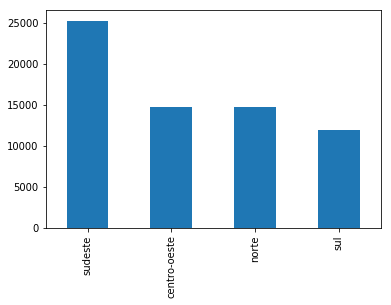

In [16]:
df.regiao.value_counts().plot(kind ='bar')

* ## Cruzando as variáveis 'região' e 'anos_estudo':

In [17]:
df_cross = pd.DataFrame(df.groupby('regiao')['anos_estudo'].mean())
df_cross

,anos_estudo
regiao,
centro-oeste,8.645646
norte,8.312951
sudeste,8.902115
sul,8.736788


In [18]:
# E se eu quisesse usar um laço para nomear as variaveis? Seria possível atrelar o nome de uma variável à variável temporária do laço?

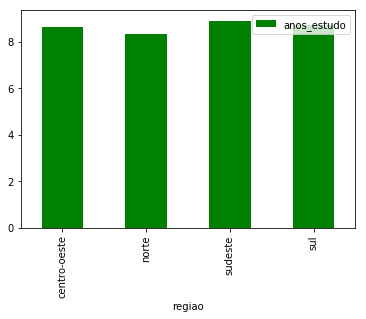

In [19]:
df_cross.plot(kind = 'bar',color = 'green')

* ##  Análise Estatística:

In [20]:
# Definindo funções de amostragem:
def sampling(df, n):
    index = np.random.choice(range(0, len(df)), size = n)
    df_s = np.array(df.iloc[index,])
    return (df_s)

def samp_means(df, n_i, n_reps):
    means = []
    for reps in range(n_reps):
        s_ = sampling(df, n_i)
        m_ = s_.mean()
        means.append(m_)
    return (means)

In [21]:
# Criando uma distribuição normal das médias de anos de estudo:

df_estudo = pd.DataFrame(df['anos_estudo'])
df_estudo.dropna(0, inplace = True)
n = 1000
sample = samp_means(df_estudo, n, 1000)

In [22]:
# Rodando o teste t para comparar as médias de cada região com a média da pop.
# Hipótese nula: as médias das regiões são estatisticamente iguais à média total da população.
for i in range(0,4):
    teste_t = st.ttest_1samp(sample, df_cross.anos_estudo[i])
    if teste_t[1] < 0.05:
        analise = 'Rejeitamos a hipótese nula.'
    else :
        analise = 'Não rejeitamos a hipótese nula.'
    print ('Regiao {0:}: \n>>> p-valor = {1:} \n>>> Resultado: {2}'.format(df_cross.index[i], teste_t[1], analise))

Regiao centro-oeste: 
>>> p-valor = 5.746078684597263e-34 
>>> Resultado: Rejeitamos a hipótese nula.
Regiao norte: 
>>> p-valor = 0.0 
>>> Resultado: Rejeitamos a hipótese nula.
Regiao sudeste: 
>>> p-valor = 0.0 
>>> Resultado: Rejeitamos a hipótese nula.
Regiao sul: 
>>> p-valor = 4.216860923253391e-41 
>>> Resultado: Rejeitamos a hipótese nula.


In [25]:
# Definindo intervalo de confiança e testando a hipótese nula para a média de cada região:
mean, sigma = np.mean(sample), np.std(sample)
SE = sigma/np.sqrt(n)
intervalo = st.norm.interval(alpha = 0.95, loc = mean, scale = SE)

for i in range(0,4):
    print (intervalo[0], '<---->', intervalo[1])
    if intervalo[0] < df_cross.anos_estudo[i] < intervalo [1]:
        
        print ('Região: {0:}\n>>> Resultado: Não rejeitamos a nula'.format(df_cross.index[i]))
    else:
        print('Região: {0:}\n>>> Resultado: Rejeitamos a nula'.format(df_cross.index[i]))

8.682057796456265 <----> 8.695444203543735
Região: centro-oeste
>>> Resultado: Rejeitamos a nula
8.682057796456265 <----> 8.695444203543735
Região: norte
>>> Resultado: Rejeitamos a nula
8.682057796456265 <----> 8.695444203543735
Região: sudeste
>>> Resultado: Rejeitamos a nula
8.682057796456265 <----> 8.695444203543735
Região: sul
>>> Resultado: Rejeitamos a nula


In [52]:
# Calculando t, t crítico e testando se rejeitamos a nula para t:
t_critico_inferior = st.ttest_1samp(sample, intervalo[1])[0]
t_critico_superior = st.ttest_1samp(sample, intervalo[0])[0]
for i in range(0,4):
    t_ = st.ttest_1samp(sample, df_cross.anos_estudo[i])[0]
    if t_critico_inferior < t_ < t_critico_superior:
        print ('Região: {0:}\n>>> Resultado: Não rejeitamos a nula'.format(df_cross.index[i]))
    else:
         print('Região: {0:}\n>>> Resultado: Rejeitamos a nula'.format(df_cross.index[i]))

Região: centro-oeste
>>> Resultado: Rejeitamos a nula
Região: norte
>>> Resultado: Rejeitamos a nula
Região: sudeste
>>> Resultado: Rejeitamos a nula
Região: sul
>>> Resultado: Rejeitamos a nula


# **Resposta final:** de fato, a região interfere sim na média de anos de estudo da população. Ou seja, a média de anos de estudo de cada região é significativamente diferente.